In [21]:
!pip install --upgrade jupyterlab
!python -m spacy download en_core_web_sm
import plotly
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import spacy
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.1 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# Read in UK population data for the Big 5 personality measure

In [22]:
uk_pop = pd.read_pickle('UK_population_big5.pkl')
uk_pop['group'] = "UK population"


# Import the survey data

In [23]:
data = pd.read_excel('LIS MASc Integration Week Data Aggregation Survey(1-20).xlsx')
data = data.dropna(axis = 1, how = 'all')

In [24]:
data

,ID,Start time,Completion time,Email,How many children do you have or would you like to have?,How many children did your birth mother give birth to?,How many children did your maternal grandmother give birth to?,"If you know, how many children did your maternal great-grandmother give birth to?","Please describe yourself in about 150 to 100 words. You can do this in any terms you like, so long as it's true to your perception of yourself",Is talkative,...,"Likes to reflect, play with ideas",Has few artistic interests,Likes to cooperate with others,Is easily distracted,"Is sophisticated in art, music, or literature","Where you are Self and your community is Other, please indicate which of the options below best captures your relationship with your community.",I identify as:,Please enter your age in years:,I would describe myself as:,Please enter a nickname that is unique but which does not identify you
0,7,2024-02-14 15:30:59,2024-02-14 15:41:35,anonymous,3,4,9,NaN,"Smart, Curious, Resilient, Foresighted, Unique...",Neither agree nor disagree,...,Agree strongly,Disagree a little,Agree a little,Agree strongly,Disagree a little,D,Male,40,Not religious,Foxtrot£cho
1,8,2024-02-14 15:44:04,2024-02-14 15:50:57,anonymous,2,3,2,2.0,"kind, creative, curious, open-minded, positive...",Disagree a little,...,Agree strongly,Disagree strongly,Agree strongly,Agree a little,Agree a little,C,Female,30,Slightly religious,midge
2,9,2024-02-14 15:35:50,2024-02-14 16:00:10,anonymous,2,2,1,7.0,"I am a generally calm, kind person who is curi...",Disagree a little,...,Agree strongly,Disagree a little,Agree strongly,Agree a little,Neither agree nor disagree,A,Female,29,Not religious,Spike
3,10,2024-02-14 15:51:27,2024-02-14 16:01:51,anonymous,4,3,5,7.0,"I am an artist. I am a keen observer, I have a...",Agree strongly,...,Agree strongly,Disagree strongly,Disagree a little,Neither agree nor disagree,Agree strongly,D,Female,25,Slightly religious,Leia
4,11,2024-02-14 16:07:05,2024-02-14 16:14:40,anonymous,6,4,4,1.0,young driven hungry foolish caring loving ecce...,Agree strongly,...,Agree strongly,Disagree a little,Agree strongly,Agree a little,Agree a little,E,Male,24,Moderately religious,certified lover boy
5,12,2024-02-14 16:17:40,2024-02-14 16:29:46,anonymous,3,2,3,11.0,"IT Management graduate, specialising in Inform...",Neither agree nor disagree,...,Agree a little,Disagree a little,Neither agree nor disagree,Agree a little,Neither agree nor disagree,B,Female,26,Not religious,ruanvlana
6,13,2024-02-14 17:14:13,2024-02-14 17:19:36,anonymous,1,2,2,NaN,"I am a cerebral and kind person, who often fin...",Disagree a little,...,Agree strongly,Disagree strongly,Disagree a little,Disagree a little,Agree strongly,B,Male,48,Not religious,Chalamet
7,14,2024-02-14 17:53:19,2024-02-14 18:09:37,anonymous,3,2,3,NaN,"friendly, open minded, strong willed, yet self...",Agree strongly,...,Agree strongly,Disagree strongly,Disagree a little,Agree a little,Agree strongly,A,Male,45,Slightly religious,majors
8,15,2024-02-14 15:23:53,2024-02-14 18:49:32,anonymous,3,3,2,2.0,"Conscientious, creative, hard working, very cu...",Agree a little,...,Agree strongly,Disagree strongly,Disagree a little,Agree strongly,Agree a little,C,Male,23,Not religious,complexsystem
9,16,2024-02-14 18:43:39,2024-02-14 18:54:20,anonymous,0,3,9,2.0,"I would describe myself as, kind, helpful, nai...",Agree a little,...,Agree strongly,Agree a little,Agree strongly,Agree strongly,Agree a little,C,Female,23,Slightly religious,Llama


# Extract Big 5 metrics

In [25]:

raw = data

values_t = ['Disagree strongly','Disagree a little','Neither agree nor disagree','Agree a little','Agree strongly']

values_n = [1,2,3,4,5]


mapping = dict(zip(values_t, values_n))



raw = raw.replace(mapping)

def rev(col):
    col_ = (5 - col) +1
    return col_

reversals = ['Is reserved', 'Tends to be quiet', 'Is sometimes shy, inhibited', 'Tends to find fault with others', 'Starts quarrels with others',\
             'Can be cold and aloof', 'Is sometimes rude to others', 'Can be somewhat careless', 'Tends to be disorganised',\
                 'Tends to be lazy', 'Is easily distracted', 'Is relaxed, can handle stress well', 'Is emotionally stable, not easily upset',\
                     'Remains calm in tense situations',  'Prefers work that is routine', 'Has few artistic interests']
    
for i in reversals:
    raw[i] = rev(raw[i])
    
raw_numbered = raw[['Is talkative', 'Tends to find fault with others',
       'Does a thorough job', 'Is depressed, blue',
       'Is original, comes up with new ideas', 'Is reserved',
       'Is helpful and unselfish with others', 'Can be somewhat careless',
       'Is relaxed, can handle stress well',
       'Is curious about many different things', 'Is full of energy',
       'Starts quarrels with others', 'Is a reliable worker', 'Can be tense',
       'Is ingenious, a deep thinker', 'Generates a lot of enthusiasm',
       'Has a forgiving nature', 'Tends to be disorganised', 'Worries a lot',
       'Has an active imagination', 'Tends to be quiet',
       'Is generally trusting', 'Tends to be lazy',
       'Is emotionally stable, not easily upset', 'Is inventive',
       'Has an assertive personality', 'Can be cold and aloof',
       'Perseveres until the task is finished', 'Can be moody',
       'Values artistic, aesthetic experiences', 'Is sometimes shy, inhibited',
       'Is considerate and kind to almost everyone', 'Does things efficiently',
       'Remains calm in tense situations', 'Prefers work that is routine',
       'Is outgoing, sociable', 'Is sometimes rude to others',
       'Makes plans and follows through with them', 'Gets nervous easily',
       'Likes to reflect, play with ideas', 'Has few artistic interests',
       'Likes to cooperate with others', 'Is easily distracted',
       'Is sophisticated in art, music, or literature']]

nums = [str(i) for i in range(1,45)]

raw_numbered.columns = nums


E = pd.concat([raw_numbered['1'], raw_numbered['6'], raw_numbered['11'], raw_numbered['16'], raw_numbered['21'], raw_numbered['26'], raw_numbered['31'], raw_numbered['36']], axis = 1)

A = pd.concat([raw_numbered['2'], raw_numbered['7'], raw_numbered['12'], raw_numbered['17'], raw_numbered['22'], raw_numbered['27'], raw_numbered['32'], raw_numbered['37'], raw_numbered['42']], axis = 1)

C = pd.concat([raw_numbered['3'],  raw_numbered['8'], raw_numbered['13'], raw_numbered['18'], raw_numbered['23'], raw_numbered['28'], raw_numbered['33'], raw_numbered['38'], raw_numbered['43']], axis = 1)

N = pd.concat([raw_numbered['4'],  raw_numbered['9'], raw_numbered['14'], raw_numbered['19'], raw_numbered['24'], raw_numbered['29'], raw_numbered['34'], raw_numbered['39']], axis = 1)

O = pd.concat([raw_numbered['5'], raw_numbered['10'], raw_numbered['15'], raw_numbered['20'], raw_numbered['25'], raw_numbered['30'], raw_numbered['35'], raw_numbered['40'], raw_numbered['25'], raw_numbered['41'], raw_numbered['44']], axis = 1)




raw['extraversion'] = E.mean(axis = 1)
raw['agreeableness'] = A.mean(axis = 1)
raw['conscientiousness'] = C.mean(axis = 1)
raw['neuroticism'] = N.mean(axis = 1)
raw['openness'] = O.mean(axis = 1)

raw = raw[['extraversion', 'agreeableness', 'conscientiousness', 'openness',
       'neuroticism']]

raw['group'] = "LIS MASc"


raw_data = pd.concat([raw, uk_pop])

all_data = raw_data.groupby('group').mean()

raw_data['names'] = data['Please enter a nickname that is unique but which does not identify you']



In [26]:
raw_data

,extraversion,agreeableness,conscientiousness,openness,neuroticism,group,names
0,3.625,3.777778,2.777778,4.454545,2.750,LIS MASc,Foxtrot£cho
1,2.250,4.666667,3.444444,4.454545,3.375,LIS MASc,midge
2,2.375,4.111111,2.444444,3.454545,2.500,LIS MASc,Spike
3,4.500,3.555556,3.333333,4.909091,2.875,LIS MASc,Leia
4,4.250,3.666667,3.666667,4.000000,2.250,LIS MASc,certified lover boy
...,...,...,...,...,...,...,...
386370,2.625,3.111111,3.111111,4.200000,4.250,UK population,NaN
386371,4.000,3.666667,2.666667,4.300000,2.625,UK population,NaN
386372,2.250,1.888889,1.333333,2.500000,3.375,UK population,NaN
386373,3.000,3.000000,3.000000,3.000000,3.000,UK population,NaN


# Create radar plots for the Big 5

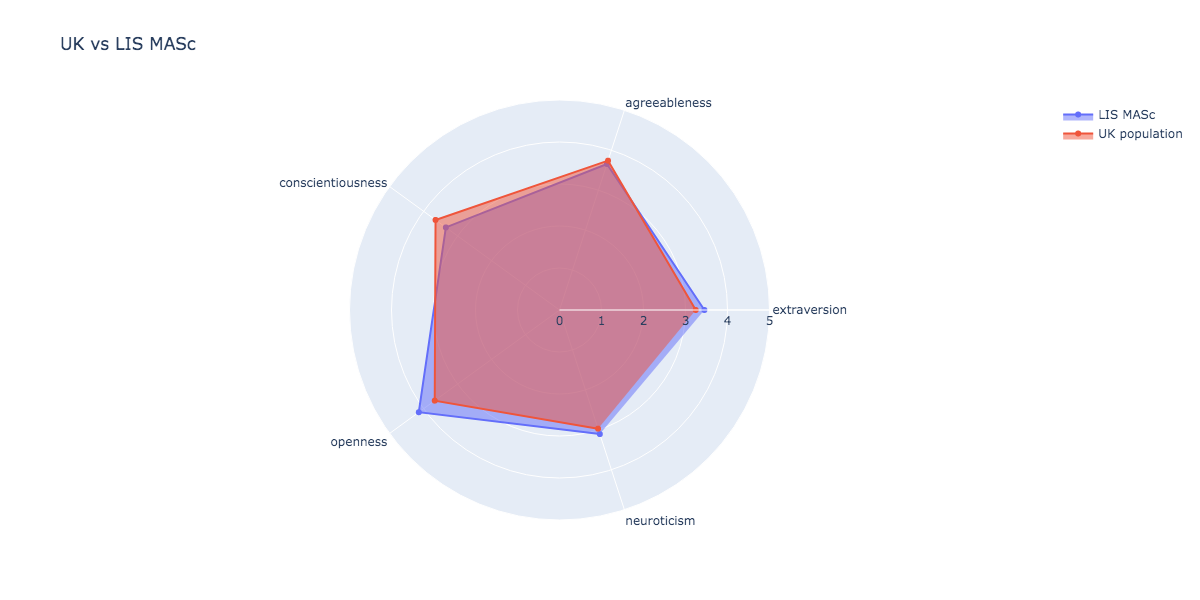

In [27]:

import plotly.graph_objects as go


categories = ['extraversion', 'agreeableness', 'conscientiousness', 'openness',
       'neuroticism']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=all_data.iloc[0],
      theta=categories,
      fill='toself',
      name= all_data.index[0]
))
fig.add_trace(go.Scatterpolar(
      r=all_data.iloc[1],
      theta=categories,
      fill='toself',
      name=all_data.index[1]
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=True
)

fig.update_layout(
    width=800,  # Width of the figure in pixels
    height=600,  # Height of the figure in pixels
    title_text='UK vs LIS MASc'  # Optional: Adding a title for demonstration
)

fig.show()


# Get kinship data

In [28]:
kin = data[["How many children do you have or would you like to have?", "How many children did your birth mother give birth to?",\
            "How many children did your maternal grandmother give birth to?", "If you know, how many children did your maternal great-grandmother give birth to?",\
           "Where you are Self and your community is Other, please indicate which of the options below best captures your relationship with your community.",\
           "I would describe myself as:", "Please enter your age in years:", "I identify as:"]]

kin.columns = ['self', 'mother', 'grandmother', 'great-grandmother', 'community', 'religion', 'age', 'gender']

kin = kin.replace({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6})
kin = kin.replace({'Not religious':1, 'Slightly religious':2, 'Moderately religious':3, 'Very religious':4})
kin['names'] = data['Please enter a nickname that is unique but which does not identify you']

In [29]:
kin

,self,mother,grandmother,great-grandmother,community,religion,age,gender,names
0,3,4,9,NaN,4,1,40,Male,Foxtrot£cho
1,2,3,2,2.0,3,2,30,Female,midge
2,2,2,1,7.0,1,1,29,Female,Spike
3,4,3,5,7.0,4,2,25,Female,Leia
4,6,4,4,1.0,5,3,24,Male,certified lover boy
5,3,2,3,11.0,2,1,26,Female,ruanvlana
6,1,2,2,NaN,2,1,48,Male,Chalamet
7,3,2,3,NaN,1,2,45,Male,majors
8,3,3,2,2.0,3,1,23,Male,complexsystem
9,0,3,9,2.0,3,2,23,Female,Llama


In [ ]:
data.columns

In [ ]:
data.columns

# Language data

In [30]:
lang = data[["Please enter a nickname that is unique but which does not identify you","Please describe yourself in about 150 to 100 words. You can do this in any terms you like, so long as it's true to your perception of yourself"]]
lang.columns = ['names', 'text']

In [31]:
lang

,names,text
0,Foxtrot£cho,"Smart, Curious, Resilient, Foresighted, Unique..."
1,midge,"kind, creative, curious, open-minded, positive..."
2,Spike,"I am a generally calm, kind person who is curi..."
3,Leia,"I am an artist. I am a keen observer, I have a..."
4,certified lover boy,young driven hungry foolish caring loving ecce...
5,ruanvlana,"IT Management graduate, specialising in Inform..."
6,Chalamet,"I am a cerebral and kind person, who often fin..."
7,majors,"friendly, open minded, strong willed, yet self..."
8,complexsystem,"Conscientious, creative, hard working, very cu..."
9,Llama,"I would describe myself as, kind, helpful, nai..."


In [32]:
def process(text):
    doc = nlp(text)
    l = [i.lemma_.lower() for i in doc if not i.is_stop and not i.is_punct]
    return l
    
lang['lemmas'] = [process(i) for i in lang['text']]

/tmp/ipykernel_656/2513075023.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
lang

,names,text,lemmas
0,Foxtrot£cho,"Smart, Curious, Resilient, Foresighted, Unique...","[smart, curious, resilient, foresighted, uniqu..."
1,midge,"kind, creative, curious, open-minded, positive...","[kind, creative, curious, open, minded, positi..."
2,Spike,"I am a generally calm, kind person who is curi...","[generally, calm, kind, person, curious, like,..."
3,Leia,"I am an artist. I am a keen observer, I have a...","[artist, keen, observer, lot, willpower, tenac..."
4,certified lover boy,young driven hungry foolish caring loving ecce...,"[young, drive, hungry, foolish, care, love, ec..."
5,ruanvlana,"IT Management graduate, specialising in Inform...","[management, graduate, specialise, information..."
6,Chalamet,"I am a cerebral and kind person, who often fin...","[cerebral, kind, person, find, life, difficult..."
7,majors,"friendly, open minded, strong willed, yet self...","[friendly, open, minded, strong, willed, self,..."
8,complexsystem,"Conscientious, creative, hard working, very cu...","[conscientious, creative, hard, working, curio..."
9,Llama,"I would describe myself as, kind, helpful, nai...","[describe, kind, helpful, naive, time, trust, ..."


In [35]:
norms = pd.read_pickle("all_norm_estimates.pkl")
import numpy as np

In [36]:
norms_ = []

nulls = pd.Series([np.nan for i in range(len(norms.columns))], index = norms.columns)


for i in lang['lemmas']:
    words = [j for j in i if j in norms.index]
    try:
        norms_.append(norms.loc[words].mean())
    except:
        norms_.append(nulls)
    

norms_df = pd.DataFrame(norms_)

lang = pd.concat([lang, norms_df], axis = 1)
        

In [37]:
LIS = raw_data[raw_data['group'] == 'LIS MASc']

lang = lang.merge(LIS, on = 'names')


In [38]:
lang = lang.merge(kin, on = 'names')

In [39]:
lang.index = lang['names']
lang = lang.drop('names', axis = 1)

<Axes: xlabel='neuroticism', ylabel='valence'>

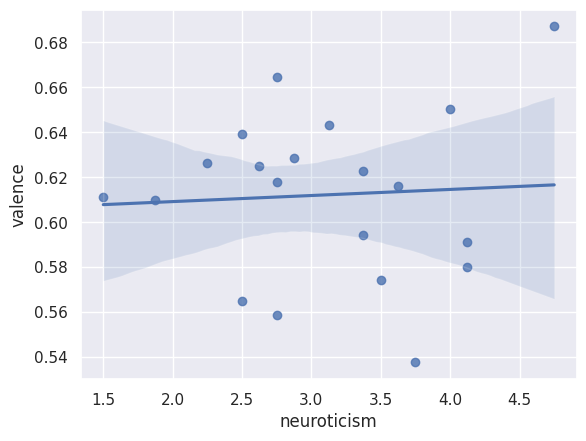

In [41]:
sns.regplot(x = 'neuroticism', y = 'valence', data = lang)

In [ ]:
lang.columns

In [42]:
lang

,text,lemmas,valence,arousal,dominance,auditory,gustatory,interoceptive,olfactory,visual,...,neuroticism,group,self,mother,grandmother,great-grandmother,community,religion,age,gender
names,,,,,,,,,,,,,,,,,,,,,
Foxtrot£cho,"Smart, Curious, Resilient, Foresighted, Unique...","[smart, curious, resilient, foresighted, uniqu...",0.617873,0.405023,0.604855,0.378107,0.073424,0.332774,0.073369,0.527553,...,2.750,LIS MASc,3,4,9,NaN,4,1,40,Male
midge,"kind, creative, curious, open-minded, positive...","[kind, creative, curious, open, minded, positi...",0.594326,0.403669,0.593165,0.403388,0.079550,0.422567,0.076607,0.529986,...,3.375,LIS MASc,2,3,2,2.0,3,2,30,Female
Spike,"I am a generally calm, kind person who is curi...","[generally, calm, kind, person, curious, like,...",0.639234,0.407249,0.611193,0.424636,0.087234,0.377757,0.095230,0.542598,...,2.500,LIS MASc,2,2,1,7.0,1,1,29,Female
Leia,"I am an artist. I am a keen observer, I have a...","[artist, keen, observer, lot, willpower, tenac...",0.628559,0.401255,0.617536,0.382610,0.058843,0.307271,0.075077,0.580438,...,2.875,LIS MASc,4,3,5,7.0,4,2,25,Female
certified lover boy,young driven hungry foolish caring loving ecce...,"[young, drive, hungry, foolish, care, love, ec...",0.626168,0.417834,0.606995,0.393089,0.077103,0.372318,0.082552,0.544882,...,2.250,LIS MASc,6,4,4,1.0,5,3,24,Male
ruanvlana,"IT Management graduate, specialising in Inform...","[management, graduate, specialise, information...",0.643181,0.384662,0.639575,0.395594,0.041338,0.207342,0.055025,0.610495,...,3.125,LIS MASc,3,2,3,11.0,2,1,26,Female
Chalamet,"I am a cerebral and kind person, who often fin...","[cerebral, kind, person, find, life, difficult...",0.687132,0.414701,0.628306,0.395473,0.100133,0.347952,0.115372,0.592320,...,4.750,LIS MASc,1,2,2,NaN,2,1,48,Male
majors,"friendly, open minded, strong willed, yet self...","[friendly, open, minded, strong, willed, self,...",0.616166,0.420746,0.593469,0.396996,0.103057,0.332007,0.110796,0.585806,...,3.625,LIS MASc,3,2,3,NaN,1,2,45,Male
complexsystem,"Conscientious, creative, hard working, very cu...","[conscientious, creative, hard, working, curio...",0.650560,0.408507,0.637546,0.439072,0.079861,0.346228,0.065762,0.554790,...,4.000,LIS MASc,3,3,2,2.0,3,1,23,Male


In [43]:
lang_ = lang[['valence', 'arousal', 'dominance',
       'auditory', 'gustatory', 'interoceptive', 'olfactory', 'visual',
       'foot_leg', 'hand_arm', 'head', 'mouth', 'torso', 'concreteness',
       'imageability', 'semantic_size', 'haptic', 'extraversion',
       'agreeableness', 'conscientiousness', 'openness', 'neuroticism']].dropna(subset = ['valence'])


In [ ]:
lang_

In [44]:
from sklearn.decomposition import PCA

In [ ]:
pca_1 = PCA(n_components = 3)
comps_1 = pca_1.fit_transform(lang_)
pc_df_1 = pd.DataFrame(data = comps_1, columns = ['PC'+str(i) for i in range(1, comps_1.shape[1]+1)])
pc_df_1['names'] = [i for i in lang_.index]
pc_df_1['text'] = [i for i in lang['text']]
pc_df_1['lemmas'] = [i for i in lang['lemmas']]

In [ ]:
import plotly.express as px

fig = px.scatter_3d(pc_df_1, x='PC1', y='PC2', z='PC3',
               hover_data = ['names'])

fig.update_traces(marker=dict(size = 5, line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show('notebook')

In [ ]:
sns.heatmap(lang_.transpose().corr())

In [ ]:
lang